<a href="https://colab.research.google.com/github/shubhpjoshi/Data-Analysis-Project-Myntra-Product-Dataset/blob/main/Myntra_Product_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Analysis Project: Myntra Product Dataset**

## **Objective**

 The primary objective of this project is to perform a comprehensive analysis of
the Myntra product dataset to gain insights into the pricing, discounts, and brand
performance.
The analysis will help understand the trends and patterns in the e-commerce market,
particularly focusing on how various brands price their products and offer discounts.

## **1. Know dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
file_path = '/content/mynta_dataset_TKA@21.csv'
myntra = pd.read_csv(file_path)
myntra.sample(10)

,Brand,Title,Selling Price,Price,Discount
39076,Alcis,Solid T-shirt,499,499,0%
24510,Roadster,Men Textured T-shirt,539,899,40%
19426,Rodzen,Men Solid Hood T-shirt,599,799,25%
32234,Aeropostale,Round Neck T-shirt,1119,1399,20%
53730,Peter England Casuals,Printed Polo Collar T-shirt,999,999,0%
5761,Puma,Printed Brand Graphic Tshirt,779,1299,40%
53172,VIMAL JONNEY,Pack of 2 V-Neck T-shirts,639,1998,68%
19655,Rigo,Striped T-shirt,499,999,50%
15489,H&M,Solid Slub Jersey T-shirt,799,799,0%
23323,H&M,Long T-shirt,699,699,0%


In [3]:
# Shape of dataset
myntra.shape

(56200, 5)

In [4]:
myntra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56200 entries, 0 to 56199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          56200 non-null  object
 1   Title          56200 non-null  object
 2   Selling Price  56200 non-null  object
 3   Price          56200 non-null  object
 4   Discount       56200 non-null  object
dtypes: object(5)
memory usage: 2.1+ MB


In [5]:
myntra.isna().sum()

Brand            0
Title            0
Selling Price    0
Price            0
Discount         0
dtype: int64

In [6]:
myntra.describe()

,Brand,Title,Selling Price,Price,Discount
count,56200,56200,56200,56200,56200
unique,496,4794,1225,533,136
top,Puma,Printed Round Neck T-shirt,699,1299,0%
freq,4000,9717,2331,5707,9504


Dataset Description: The dataset contains the following columns:


*   Brand: The brand name of the product.
*   Title: The title or name of the product.
*   Selling Price: The price at which the product is being sold.
*   Price: The original price of the product.
*   Discount: The discount offered on the product.

## **2. Understanding variables**

In [7]:
# Columns to convert
columns_to_convert = ['Selling Price', 'Price']

# Convert specified columns to numeric, forcing errors to NaN
myntra[columns_to_convert] = myntra[columns_to_convert].apply(pd.to_numeric, errors='coerce')

myntra[columns_to_convert] = myntra[columns_to_convert].fillna(0)

myntra[columns_to_convert] = myntra[columns_to_convert].astype(int)

In [8]:
myntra.dtypes

Brand            object
Title            object
Selling Price     int64
Price             int64
Discount         object
dtype: object

In [9]:
myntra.describe()

,Selling Price,Price
count,56200.000000,56200.000000
mean,925.662064,1366.902438
std,705.515449,893.811934
min,0.000000,0.000000
25%,526.000000,849.000000
50%,764.000000,1199.000000
75%,1017.250000,1599.000000
max,13000.000000,15000.000000


In [10]:
myntra.isnull().sum()

Brand            0
Title            0
Selling Price    0
Price            0
Discount         0
dtype: int64

### checking the unique values

In [50]:
myntra['Brand'].nunique()

496

In [40]:
for col in myntra.columns:
  print(f"Unique values for {col}: {myntra[col].unique()}")

Unique values for Brand: ['HRX by Hrithik Roshan' 'HERE&NOW' 'Moda Rapido' 'Roadster' 'DILLINGER'
 'FIDO DIDO' 'Nautica' 'H&M' 'HARBORNBAY' 'WROGN' 'Puma' 'WROGN ACTIVE'
 'Superdry' 'Levis' 'Difference of Opinion' 'ether' 'Kook N Keech' 'GANT'
 'Kook N Keech Marvel' 'Beverly Hills Polo Club' 'Jack & Jones' 'SG'
 'Campus Sutra' 'Nike' 'Rodzen' 'Rigo' 'Calvin Klein Jeans' 'Okane'
 'Timberland' 'The Souled Store' 'Kappa' 'Duke' 'Proline Active'
 'Wildcraft' 'Austin wood' 'Ecko Unltd' 'Mast & Harbour' 'Maniac'
 'Indian Terrain' 'Justice League' 'M7 by Metronaut' 'Sztori'
 'American Crew' 'Allen Solly' 'U.S. Polo Assn.' 'LOCOMOTIVE' 'HIGHLANDER'
 'Iron Man' 'Bossini' 'Jockey' 'The North Face' 'Dollar Bigboss'
 'Crocodile' 'French Connection' 'PORTBLAIR' 'United Colors of Benetton'
 'GAS' 'Harvard' 'AMERICAN EAGLE OUTFITTERS' 'Proline' 'INVICTUS' 'VEIRDO'
 'Kryptic' 'Marks & Spencer' 'WILD WEST' 'ADIDAS'
 'U.S. Polo Assn. Denim Co.' 'SWISS MILITARY' 'Steenbok'
 'Dexter by Kook N Keech' 'Cond

In [11]:
myntra.nunique()

Brand             496
Title            4794
Selling Price    1219
Price             486
Discount          136
dtype: int64

Brand
Puma                         4000
H&M                          3424
Jack & Jones                 2657
Roadster                     2551
WROGN                        1449
United Colors of Benetton    1294
Tommy Hilfiger               1159
Kalt                          833
Free Authority                790
U.S. Polo Assn.               747
Blackberrys                   653
HRX by Hrithik Roshan         588
Mast & Harbour                573
GAP                           545
Moda Rapido                   529
NBA                           525
Calvin Klein Jeans            521
HERE&NOW                      518
Alcis                         508
Flying Machine                505
Name: count, dtype: int64

In [13]:
myntra['Discount'].unique()

array(['5%', '50%', '35%', '56%', '0%', '45%', ' 30 %', '25%', '60%',
       '40%', '20%', '52%', '30%', '58%', 'Rs. 249 OFF)%', '15%', '10%',
       'Rs. 270 OFF)%', '55%', ' 20 %', '65%', 'Rs. 1209 OFF)%',
       'Rs. 165 OFF)%', 'Rs. 299 OFF)%', '47%', '42%', 'Rs. 1300 OFF)%',
       '1%', '70%', '59%', '72%', 'Rs. 700 OFF)%', '19%', '64%', '38%',
       'Rs. 500 OFF)%', '22%', '73%', 'Rs. 375 OFF)%', '66%', '44%',
       '48%', '6%', 'Rs. 600 OFF)%', '53%', '51%', '75%', '21%', '71%',
       '31%', '57%', 'Rs. 800 OFF)%', '4%', '61%', '54%', '13%', '74%',
       '77%', '76%', 'Rs. 1100 OFF)%', '29%', '37%', '62%', '16%',
       'Rs. 550 OFF)%', '26%', '23%', '28%', '24%', '27%', '43%', '67%',
       '46%', '18%', '32%', 'Rs. 2100 OFF)%', '34%', 'Rs. 400 OFF)%',
       '63%', 'Rs. 650 OFF)%', 'Rs. 1400 OFF)%', 'Rs. 1500 OFF)%', '69%',
       '41%', '39%', 'Rs. 1800 OFF)%', '33%', '68%', 'Rs. 709 OFF)%',
       '36%', 'Rs. 900 OFF)%', 'Rs. 1200 OFF)%', '2%', 'et upto 42%',
       ' 4

In [14]:
myntra[myntra['Discount']=='77%']

,Brand,Title,Selling Price,Price,Discount
1984,ELEGANCE,Solid Hood T-shirt,321,1399,77%
3677,ELEGANCE,Printed Round Neck T-shirt,321,1399,77%
27150,ELEGANCE,Solid Polo Collar T-shirt,321,1399,77%
29401,ELEGANCE,Solid Polo Collar T-shirt,321,1399,77%
40714,ELEGANCE,Solid Polo Collar T-shirt,321,1399,77%
43041,ELEGANCE,Men Solid Polo Collar T-shirt,321,1399,77%
43406,ELEGANCE,Solid Polo Collar T-shirt,321,1399,77%
44040,ELEGANCE,Solid Polo Collar T-shirt,321,1399,77%
44769,ELEGANCE,Solid Polo Collar T-shirt,321,1399,77%
45277,ELEGANCE,Solid Polo Collar T-shirt,321,1399,77%


In [15]:
myntra[myntra['Title']=='Printed Round Neck T-shirt']

,Brand,Title,Selling Price,Price,Discount
14,HERE&NOW,Printed Round Neck T-shirt,319,799,60%
17,Superdry,Printed Round Neck T-shirt,2879,3599,20%
24,Roadster,Printed Round Neck T-shirt,499,499,0%
26,Kook N Keech,Printed Round Neck T-shirt,399,799,50%
28,Kook N Keech Marvel,Printed Round Neck T-shirt,359,599,40%
...,...,...,...,...,...
56185,Tommy Hilfiger,Printed Round Neck T-shirt,1299,1999,35%
56190,Puma,Printed Round Neck T-shirt,3249,4999,35%
56192,Tommy Hilfiger,Printed Round Neck T-shirt,1494,2299,35%
56193,Wrangler,Printed Round Neck T-shirt,597,1195,50%


In [22]:
myntra[myntra['Brand']=='Puma']

,Brand,Title,Selling Price,Price,Discount
15,Puma,Printed Logo Split T-shirt,779,1299,40%
65,Puma,Printed Logo Split T-shirt,779,1299,40%
115,Puma,Printed Logo Split T-shirt,779,1299,40%
165,Puma,Printed Logo Split T-shirt,779,1299,40%
215,Puma,Printed Logo Split T-shirt,779,1299,40%
...,...,...,...,...,...
56191,Puma,India Grindle Polo T-shirt,1379,2299,40%
56196,Puma,Archive Logo Tee Croissant,824,1499,45%
56197,Puma,Solid ESS Jersey Polo T-shirt,844,1299,35%
56198,Puma,Printed Round Neck T-shirt,844,1299,35%


## **3. DATA Cleaning**

In [24]:
import re
def extract_price(text):
    # Use regex to find digits
    matches = re.findall(r'\d+', str(text))
    # Return the first match (assuming the first number in the string is the price)
    if matches:
        return int(matches[0])  # Convert the matched string to an integer
    else:
        return None  # Return None if no digits are found

# Apply the function to the Selling Price column
myntra['Original_selling_Price'] = myntra['Selling Price'].apply(extract_price)


In [25]:
# Define a function to extract numeric values using regex
def extract_numeric(value):
    import re
    # Regular expression to find numbers
    numbers = re.findall(r'\d+', str(value))
    # Return the first number found (assuming it's the main price)
    if numbers:
        return int(numbers[0])  # Convert to integer
    else:
        return None  # Handle cases where no numbers are found

# Apply the function to extract numeric values from the 'Price' column
myntra['Original Price'] = myntra['Price'].apply(extract_numeric)


In [26]:
myntra.dtypes

Brand                     object
Title                     object
Selling Price              int64
Price                      int64
Discount                  object
Original_selling_Price     int64
Original Price             int64
dtype: object

In [27]:
myntra.head()

,Brand,Title,Selling Price,Price,Discount,Original_selling_Price,Original Price
0,HRX by Hrithik Roshan,Printed Round Neck T-Shirt,664,699,5%,664,699
1,HERE&NOW,Solid Polo T-shirt,399,799,50%,399,799
2,Moda Rapido,Colourblocked Round Neck T-shirt,454,699,35%,454,699
3,Roadster,Camouflage Round Neck T-shirt,454,699,35%,454,699
4,DILLINGER,Colourblocked Round Neck Navy Blue T-shirt,449,899,50%,449,899


In [28]:
myntra['price_off'] =  myntra['Price'] - myntra['Selling Price']
myntra.head()

,Brand,Title,Selling Price,Price,Discount,Original_selling_Price,Original Price,price_off
0,HRX by Hrithik Roshan,Printed Round Neck T-Shirt,664,699,5%,664,699,35
1,HERE&NOW,Solid Polo T-shirt,399,799,50%,399,799,400
2,Moda Rapido,Colourblocked Round Neck T-shirt,454,699,35%,454,699,245
3,Roadster,Camouflage Round Neck T-shirt,454,699,35%,454,699,245
4,DILLINGER,Colourblocked Round Neck Navy Blue T-shirt,449,899,50%,449,899,450


In [29]:
myntra.columns

Index(['Brand', 'Title', 'Selling Price', 'Price', 'Discount',
       'Original_selling_Price', 'Original Price', 'price_off'],
      dtype='object')

In [30]:
# top 10 brands offering the highest average discounts.
round(myntra.groupby('Brand')['price_off'].mean().sort_values(ascending=False).head(10),2)

Brand
GANT                 3176.50
Polo Ralph Lauren    1552.31
Antony Morato        1545.87
Lacoste              1476.18
Red Tape             1423.34
VIMAL JONNEY         1253.13
Nautica              1212.92
LA LOFT              1182.26
Jn Joy               1176.47
98 Degree North      1168.50
Name: price_off, dtype: float64

In [31]:
# Top 10 brands having highest earning
myntra.groupby('Brand')['Original_selling_Price'].sum().sort_values(ascending = False).head(10)

Brand
Puma                         4267171
Tommy Hilfiger               2329930
H&M                          2327756
Jack & Jones                 2138972
Calvin Klein Jeans           1513834
Roadster                     1372108
United Colors of Benetton    1269360
Superdry                     1145036
WROGN                         992303
U.S. Polo Assn.               979280
Name: Original_selling_Price, dtype: int64

## **4. Exploratory Data analysis**

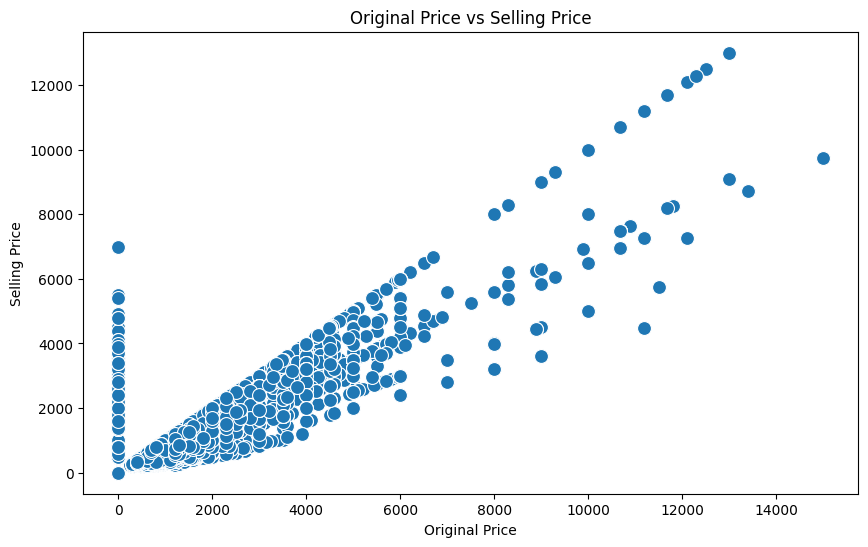

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Original Price', y='Selling Price',  data=myntra, s=100)
plt.title('Original Price vs Selling Price')
plt.xlabel('Original Price')
plt.ylabel('Selling Price')
plt.show()

In [61]:
most_selling_brands = myntra['Brand'].value_counts(ascending = False ).head(20)
most_selling_brands

Brand
Puma                         4000
H&M                          3424
Jack & Jones                 2657
Roadster                     2551
WROGN                        1449
United Colors of Benetton    1294
Tommy Hilfiger               1159
Kalt                          833
Free Authority                790
U.S. Polo Assn.               747
Blackberrys                   653
HRX by Hrithik Roshan         588
Mast & Harbour                573
GAP                           545
Moda Rapido                   529
NBA                           525
Calvin Klein Jeans            521
HERE&NOW                      518
Alcis                         508
Flying Machine                505
Name: count, dtype: int64

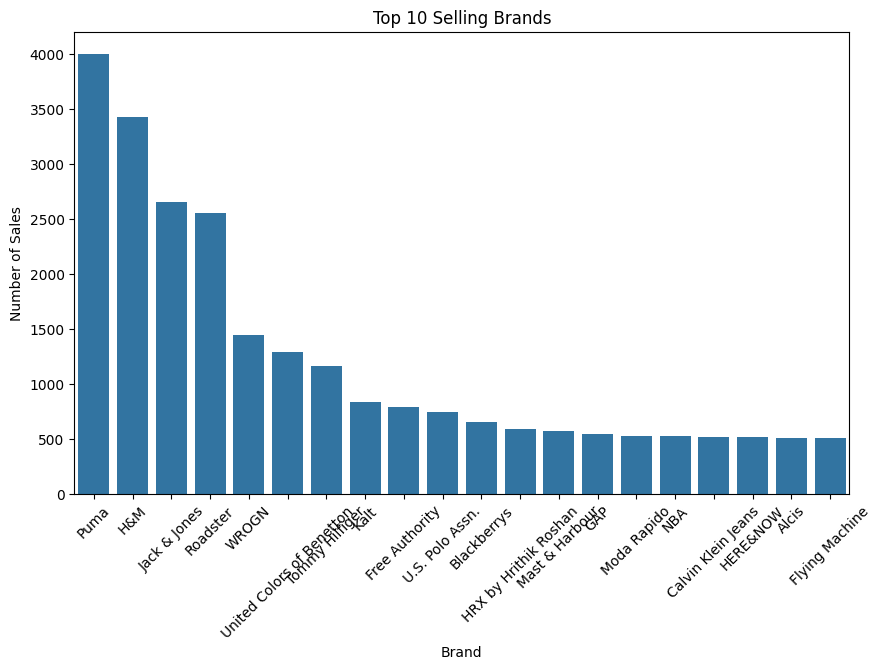

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x=most_selling_brands.index, y=most_selling_brands.values)
plt.title('Top 10 Selling Brands')
plt.xlabel('Brand')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()